In [12]:
import matplotlib.pyplot as plt

def plot_metrics_over_iterations(iteration_metrics, selected_metrics):
    """
    Plot selected metrics over iterations with annotations for each point.

    Args:
    - iteration_metrics (list of dicts): List of dictionaries containing metrics for each iteration.
    - selected_metrics (list of str): List of metric names to include in the plot.
    """
    iterations = list(range(1, len(iteration_metrics) + 1))

    for metric in selected_metrics:
        metric_values = [iteration[metric] for iteration in iteration_metrics]
        plt.plot(iterations, metric_values, label=metric)
        for i, txt in enumerate(metric_values):
            plt.annotate(f'{txt:.3f}', (iterations[i], metric_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel('Iterations')
    plt.ylabel('Metric Values')
    plt.title('Metrics Over Iterations')
    plt.legend()
    plt.xticks(iterations)  # Set discrete values on the x-axis
    plt.grid(True)
    plt.show()


In [13]:
all_iteration_metrics = [{'acc_avg': 0.8623165782079301, 'acc_per_type': [0.8361204 , 0.843987  , 0.8619186 , 0.90017513, 0.90938511,
       0.83333333], 'PQD': 0.9163701067615659, 'DPM': 0.5124885877078966, 'EOM': 0.6339486598215766, 'EOpp0': 0.08831508513199138, 'EOpp1': 0.10232650811656818, 'EOdd': 0.15682559660587236, 'NAR': 0.08800728194906789, 'AUC': -1, 'acc_avg_binary': 0.8623165782079301, 'acc_per_type_binary': [0.84744228, 0.89537223], 'PQD_binary': 0.9464692448156419, 'DPM_binary': 0.7392386832790468, 'EOM_binary': 0.9531687177285546, 'NAR_binary': 0.055002929357281724}, {'acc_avg': 0.8604433343740243, 'acc_per_type': [0.83277592, 0.84073673, 0.8619186 , 0.89842382, 0.90614887,
       0.84210526], 'PQD': 0.9190277114190157, 'DPM': 0.5396196210362103, 'EOM': 0.6712555354672342, 'EOpp0': 0.08818727028651274, 'EOpp1': 0.11619812862694634, 'EOdd': 0.17620778278407145, 'NAR': 0.08495337871742002, 'AUC': -1, 'acc_avg_binary': 0.8604433343740243, 'acc_per_type_binary': [0.84517881, 0.8943662 ], 'PQD_binary': 0.9450030833063023, 'DPM_binary': 0.7392356662968042, 'EOM_binary': 0.9473990160308502, 'NAR_binary': 0.0565520097790371}, {'acc_avg': 0.8570090540118639, 'acc_per_type': [0.8277592 , 0.83531961, 0.86046512, 0.8966725 , 0.90614887,
       0.83333333], 'PQD': 0.9134913999044434, 'DPM': 0.5261051162633957, 'EOM': 0.6549309543540728, 'EOpp0': 0.08868350451953344, 'EOpp1': 0.11042257918570542, 'EOdd': 0.17230472768424987, 'NAR': 0.09115610305808562, 'AUC': -1, 'acc_avg_binary': 0.8570090540118639, 'acc_per_type_binary': [0.84110457, 0.89235412], 'PQD_binary': 0.942568145176313, 'DPM_binary': 0.7409927507922668, 'EOM_binary': 0.9510103030945493, 'NAR_binary': 0.05912982251489997}]

In [30]:
import pandas as pd
df = pd.DataFrame([all_iteration_metrics[0]])
df=pd.concat([df, pd.DataFrame([all_iteration_metrics[1]])], ignore_index=True)
df=pd.concat([df, pd.DataFrame([all_iteration_metrics[2]])], ignore_index=True)

In [34]:
def plot_metrics_over_iterations(df, selected_metrics):
    """
    Plot selected metrics over iterations with annotations for each point.

    Args:
    - df (pd.DataFrame): Dataframe containing metrics for each iteration.
    - selected_metrics (list of str): List of metric names to include in the plot.
    """
    iterations = list(range(1, len(df) + 1))

    for metric in selected_metrics:
        plt.plot(iterations, df[metric], label=metric)
        for i, txt in enumerate(df[metric]):
            plt.annotate(f'{txt:.3f}', (iterations[i], df[metric][i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel('Iterations')
    plt.ylabel('Metric Values')
    plt.title('Metrics Over Iterations')
    plt.legend()
    plt.xticks(iterations)  # Set discrete values on the x-axis
    plt.grid(True)
    plt.show()

In [36]:
df.columns

Index(['acc_avg', 'acc_per_type', 'PQD', 'DPM', 'EOM', 'EOpp0', 'EOpp1',
       'EOdd', 'NAR', 'AUC', 'acc_avg_binary', 'acc_per_type_binary',
       'PQD_binary', 'DPM_binary', 'EOM_binary', 'NAR_binary'],
      dtype='object')

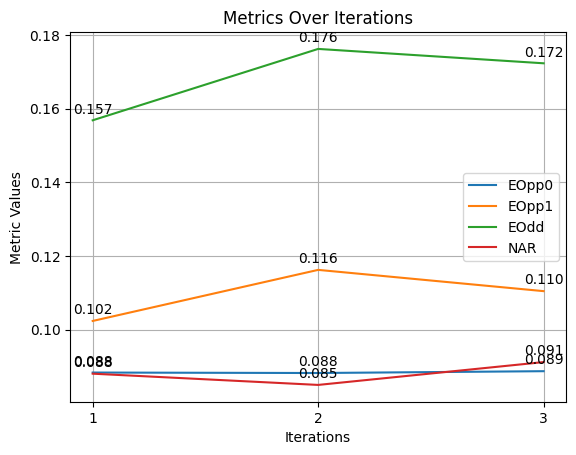

In [35]:
selected_metrics = ['EOpp0', 'EOpp1', 'EOdd', 'NAR']
plot_metrics_over_iterations(df, selected_metrics)

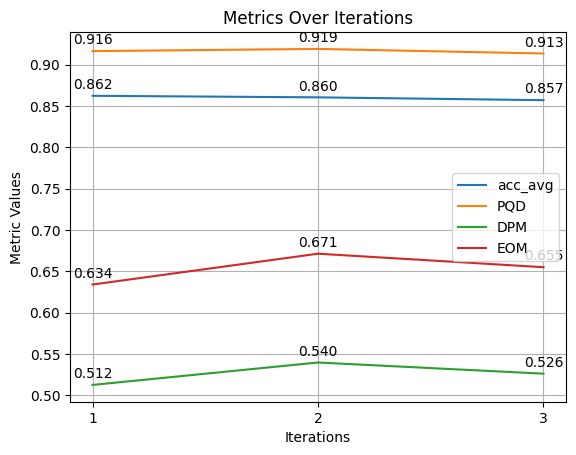

In [33]:
selected_metrics = ['acc_avg', 'PQD', 'DPM', 'EOM']
plot_metrics_over_iterations(df, selected_metrics)

In [3]:
import sys
sys.path.append('..')

import pandas as pd
from Utils.Metrics import cal_metrics

for i in range(17):
    df = pd.read_csv(f"/home/ali/Outputs/Pruning/PruningEXP1/validation_results_DeiT_S_LRP_PIter{i}_epoch=50_random_holdout.csv")
    metrics = cal_metrics(df)

    if i == 0:
        val_metrics_df = pd.DataFrame([metrics])
    else:
        val_metrics_df = pd.concat(
            [val_metrics_df, pd.DataFrame([metrics])], ignore_index=True
        )
val_metrics_df


,acc_avg,acc_per_type,PQD,DPM,EOM,EOpp0,EOpp1,EOdd,NAR,AUC,acc_avg_binary,acc_per_type_binary,PQD_binary,DPM_binary,EOM_binary,NAR_binary
0,0.862317,"[0.8361204013377926, 0.8439869989165764, 0.861...",0.916370,0.512489,0.633949,0.088315,0.102327,0.156826,0.088007,-1,0.862317,"[0.8474422815753735, 0.8953722334004024]",0.946469,0.739239,0.953169,0.055003
1,0.860443,"[0.8327759197324415, 0.8407367280606717, 0.861...",0.919028,0.539620,0.671256,0.088187,0.116198,0.176208,0.084953,-1,0.860443,"[0.8451788139429606, 0.8943661971830986]",0.945003,0.739236,0.947399,0.056552
2,0.857009,"[0.8277591973244147, 0.8353196099674973, 0.860...",0.913491,0.526105,0.654931,0.088684,0.110423,0.172305,0.091156,-1,0.857009,"[0.8411045722046174, 0.892354124748491]",0.942568,0.740993,0.951010,0.059130
3,0.856072,"[0.8260869565217391, 0.8331527627302275, 0.863...",0.908402,0.514814,0.653075,0.095637,0.096541,0.164518,0.096919,-1,0.856072,"[0.840651878678135, 0.8903420523138833]",0.944190,0.739382,0.957636,0.057412
4,0.852014,"[0.8210702341137124, 0.8277356446370531, 0.859...",0.902885,0.513956,0.655313,0.103003,0.104361,0.178846,0.103122,-1,0.852014,"[0.8356722498868266, 0.8883299798792756]",0.940723,0.736492,0.954711,0.061088
5,0.850765,"[0.8193979933110368, 0.8255687973997833, 0.859...",0.901046,0.507651,0.654253,0.105555,0.105005,0.180015,0.105189,-1,0.850765,"[0.8343141693073789, 0.8873239436619719]",0.940259,0.735505,0.954468,0.061581
6,0.851077,"[0.8177257525083612, 0.8266522210184182, 0.863...",0.902419,0.506543,0.656090,0.095911,0.104306,0.172010,0.103386,-1,0.851077,"[0.8356722498868266, 0.8853118712273642]",0.943930,0.745607,0.954022,0.057687
7,0.850140,"[0.8160535117056856, 0.8234019501625135, 0.859...",0.894186,0.521276,0.689755,0.094568,0.091443,0.149175,0.112739,-1,0.850140,"[0.8325033952014487, 0.8893360160965795]",0.936095,0.737638,0.962850,0.066014
8,0.848892,"[0.8110367892976589, 0.8223185265438786, 0.861...",0.895037,0.513806,0.691753,0.097491,0.095366,0.154957,0.111097,-1,0.848892,"[0.8315980081484835, 0.8873239436619719]",0.937198,0.737060,0.960338,0.064838
9,0.847331,"[0.8110367892976589, 0.8223185265438786, 0.859...",0.901476,0.544533,0.693848,0.093110,0.104109,0.163788,0.104046,-1,0.847331,"[0.8306926210955183, 0.8843058350100603]",0.939373,0.745891,0.955969,0.062523


In [49]:
val_metrics_df.to_csv("/home/ali/Outputs/Pruning/PruningEXP1/Pruning_metrics.csv", index=False)

In [43]:
import os
import matplotlib.pyplot as plt
def plot_metrics(df, selected_metrics, postfix):
    """
    Plot selected metrics over iterations with annotations for each point.

    Args:
    - df (pd.DataFrame): Dataframe containing metrics for each iteration.
    - selected_metrics (list of str): List of metric names to include in the plot.
    """
    
    iterations = list(range(1, len(df) + 1))
    plt.figure(figsize=(len(df), len(df)*0.6))    
    for metric in selected_metrics:
        plt.plot(iterations, df[metric], label=metric)
        for i, txt in enumerate(df[metric]):
            plt.annotate(
                f"{txt:.3f}",
                (iterations[i], df[metric][i]),
                textcoords="offset points",
                xytext=(0, 5),
                ha="center",
                fontsize=12
            )

    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Metric Values", fontsize=14)
    plt.title("Metrics Over Iterations", fontsize=16)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.xticks(iterations, fontsize=12)  # Set discrete values on the x-axis
    plt.yticks(fontsize=12)
    plt.grid(True)
    
    
    plt.savefig(
        os.path.join(
            "/home/ali/Outputs/Pruning/PruningEXP1/", f"DeiT_S_LRP_pruning_metrics_{postfix}.png"
        )
    )

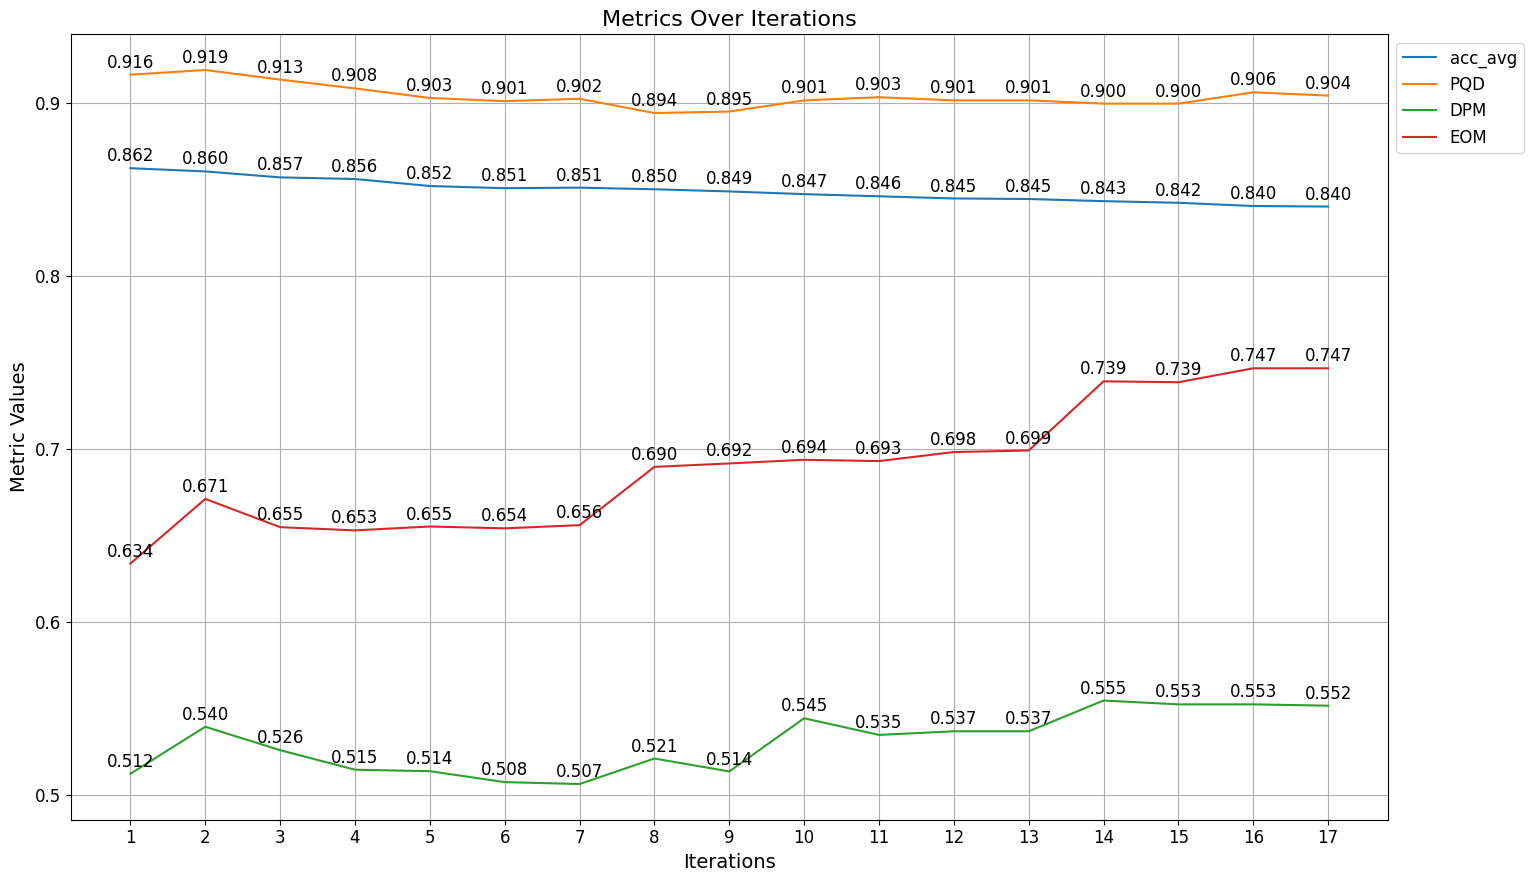

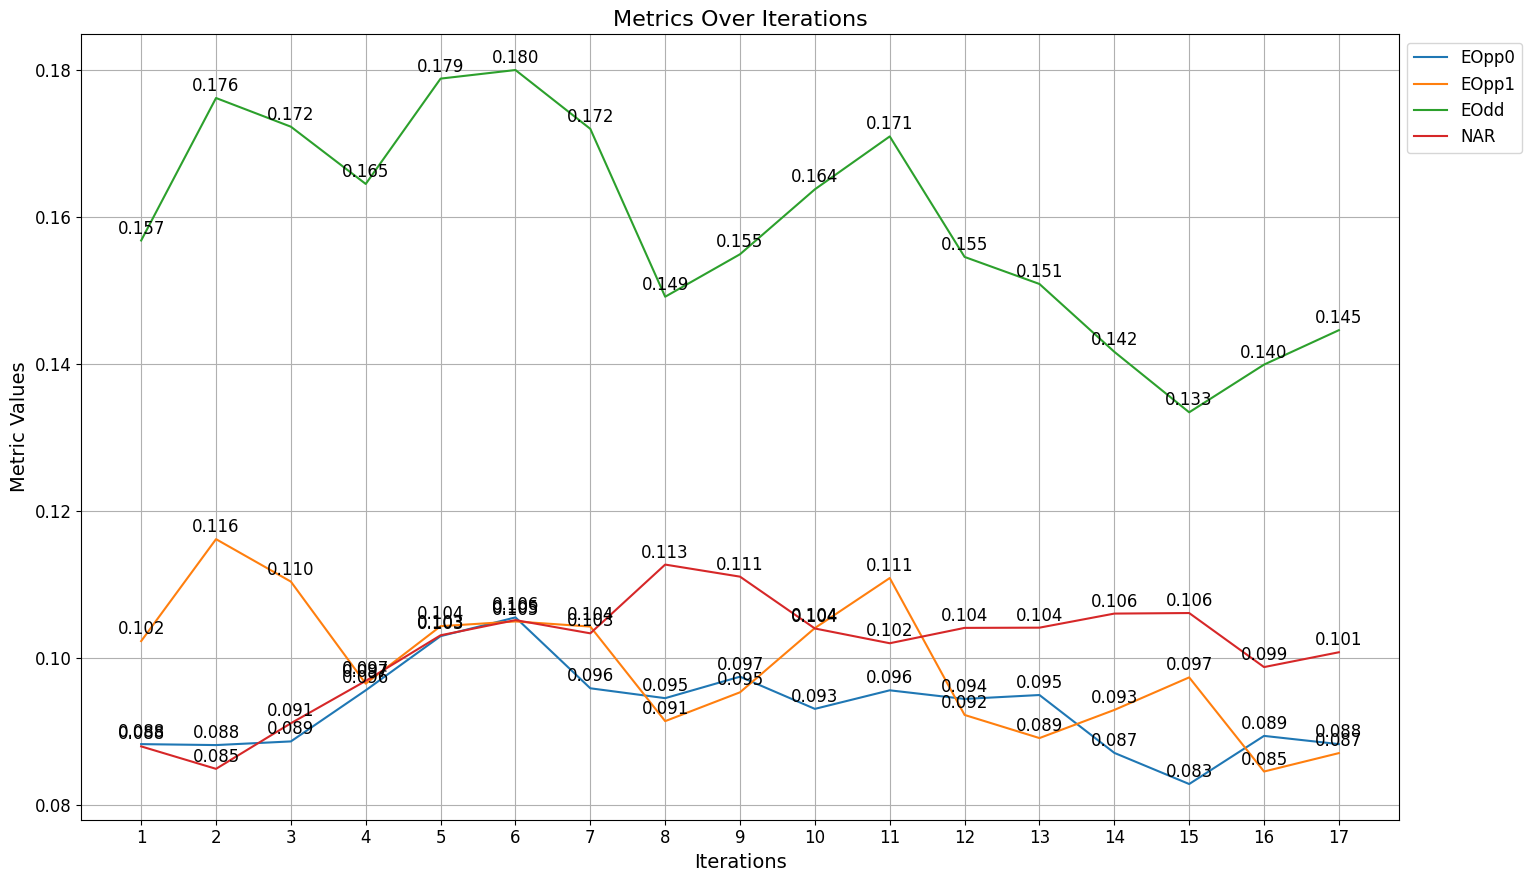

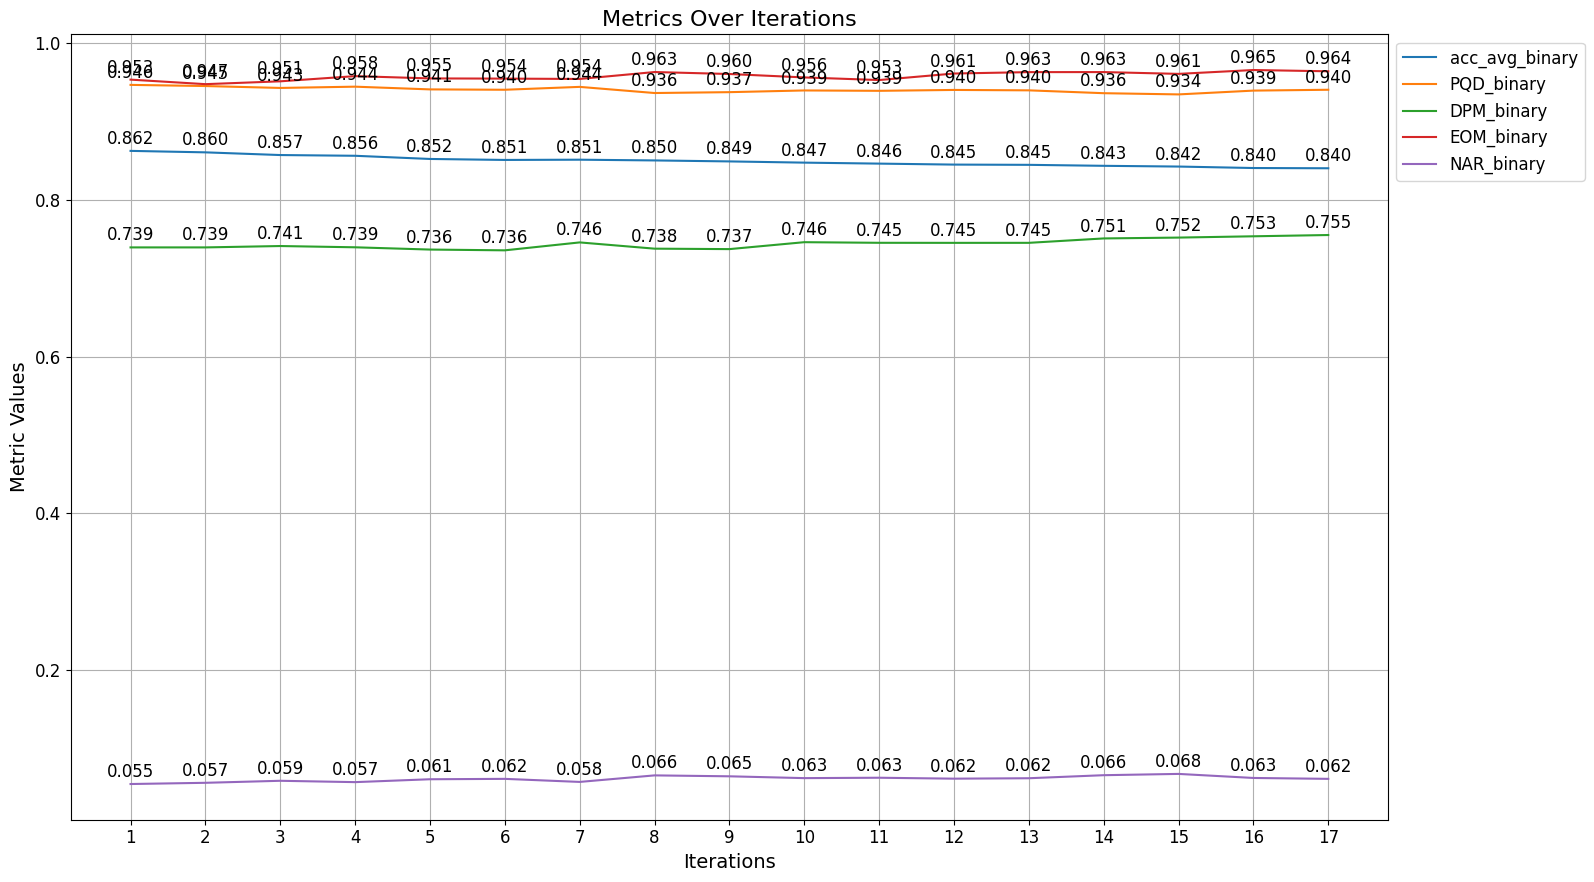

In [47]:
plot_metrics(val_metrics_df, ["acc_avg", "PQD", "DPM", "EOM"], "positive")
plot_metrics(val_metrics_df, ["EOpp0", "EOpp1", "EOdd", "NAR"], "negative")
plot_metrics(
    val_metrics_df,
    ["acc_avg_binary", "PQD_binary", "DPM_binary", "EOM_binary", "NAR_binary"],
    "binary"
)